In [1]:
import numpy
import py_entropy
from matplotlib import pyplot
import os

from tqdm.notebook import tqdm

pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
output_dir = "variable_filling"

os.makedirs(output_dir, exist_ok=True)

# Sweep over filling fractions

Try filling lhs of chain with a macroscopic density of defects given by $\bar n = \frac{1}{frac}$

$$\rho = \vert 0 .. \frac{L}{f} \rangle \langle 0 .. \frac{L}{f} \vert$$

In [3]:
%%time

frac_num = [2,3,4,5]

all_data = {}

for frac in tqdm(frac_num):
    k = 10000
    ne = 128
    ls = numpy.arange(frac,16 + frac,frac)

    single_filename = os.path.join(output_dir, f"{frac}_all_defects_left.npz")

    if os.path.exists(single_filename):
        arr = numpy.load(single_filename)
        ls = arr['ls']
        pure_purities = arr['data']
        hilbert_space_sizes = arr['Ds']
    else:
        all_purities = []
        hilbert_space_sizes = []
        for l in tqdm(ls):
            indices = list(range(l//frac))
            probs = numpy.array([1.0], dtype=numpy.complex128)
            s = py_entropy.MultiDefectState([indices], probs, l, l//frac, num_experiments=ne)
            purities = s.apply_alternative_layers_and_save_mean_purity(k)
            D = len(s.get_enumerated_states())
            all_purities.append(purities)
            hilbert_space_sizes.append(D)
        pure_purities = numpy.array(all_purities)
        hilbert_space_sizes = numpy.array(hilbert_space_sizes)
        numpy.savez(single_filename, data=pure_purities, ls=ls, Ds=hilbert_space_sizes)
    all_data[frac] = (pure_purities, ls, hilbert_space_sizes)

  0%|          | 0/4 [00:00<?, ?it/s]

CPU times: user 18.2 ms, sys: 9.81 ms, total: 28 ms
Wall time: 31.6 ms


5


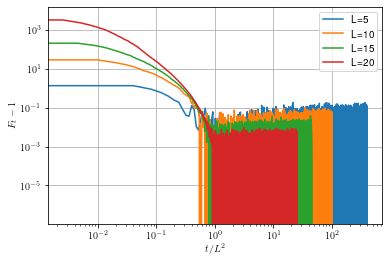

4


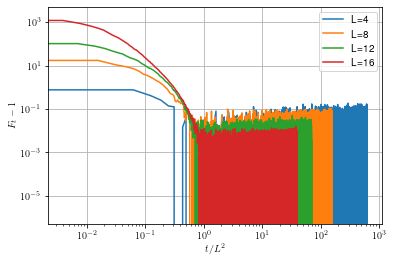

3


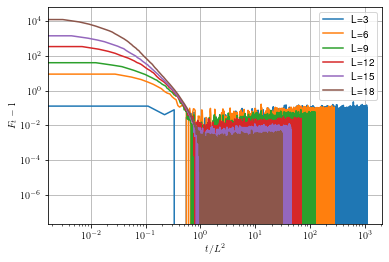

2


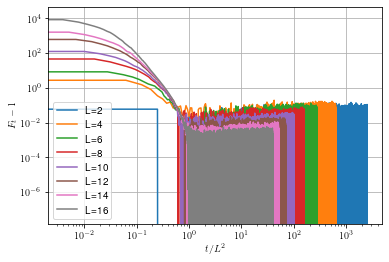

In [5]:
for frac in reversed(sorted(all_data.keys())):
    print(frac)
    pure_purities, ls, _ = all_data[frac]
    
    for l, purity in zip(ls, pure_purities):
        T = len(purity)
        pyplot.plot(numpy.arange(T) / (l**2), purity - 1, label=f"L={l}")

    pyplot.xlabel('$t/L^2$')
    pyplot.ylabel('$F_t - 1$')
    pyplot.yscale('log')
    pyplot.xscale('log')
    pyplot.legend()
    pyplot.grid()
    pyplot.savefig(os.path.join(output_dir, f'frac_{frac}_purestate_estimator_diff_scaled.pdf'))
    pyplot.show()

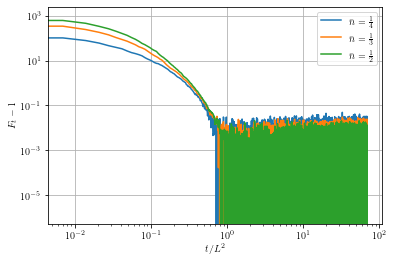

In [6]:
group_for_l = 12
for frac in reversed(sorted(all_data.keys())):
    pure_purities, ls, _ = all_data[frac]
    
    for l, purity in zip(ls, pure_purities):
        if l == group_for_l:
            T = len(purity)
            pyplot.plot(numpy.arange(T) / (l**2), purity - 1, label=fr"$\bar n=\frac{1}{frac}$")

pyplot.xlabel('$t/L^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, f'l_{group_for_l}_purestate_estimator_diff_scaled.pdf'))
pyplot.show()

# Increasing number of defects

$$\rho = \vert 0 .. m\rangle \langle 0 .. m\vert$$

In [7]:
k = 10000
ne = 128
l = 16
ms = numpy.arange(1,l//2 + 1)

single_filename = os.path.join(output_dir, f"increasing_m_l={l}_all_defects_left.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    ms = arr['ms']
    pure_purities = arr['data']
    hilbert_space_sizes = arr['Ds']
else:
    all_purities = []
    hilbert_space_sizes = []
    
    for m in tqdm(ms):
        indices = numpy.arange(m)
        probs = numpy.array([1.0], dtype=numpy.complex128)
        s = py_entropy.MultiDefectState([indices], probs, l, m, num_experiments=ne)
        purities = s.apply_alternative_layers_and_save_mean_purity(k)
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        hilbert_space_sizes.append(D)
    pure_purities = numpy.array(all_purities)
    hilbert_space_sizes = numpy.array(hilbert_space_sizes)
    numpy.savez(single_filename, data=pure_purities, ms=ms, Ds=hilbert_space_sizes)

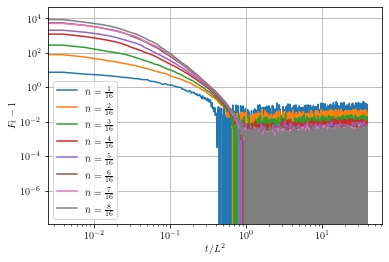

In [8]:
for m, purity in zip(ms, pure_purities):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), purity - 1, label=fr"$\bar n=\frac{{{m}}}{{{l}}}$")

pyplot.xlabel('$t/L^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, f'l_{l}_purestate_estimator_diff_scaled.pdf'))
pyplot.show()

## Now Neel states

$$\rho = \vert 0, \frac{L}{m}, 2\frac{L}{m} ...\rangle\langle 0, \frac{L}{m}, 2\frac{L}{m}, ...\vert$$

In [12]:
k = 10000
ne = 128
l = 16
ms = numpy.arange(1,l//2 + 1)

single_filename = os.path.join(output_dir, f"increasing_m_l={l}_all_defects_intertwined.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    ms = arr['ms']
    pure_purities = arr['data']
    hilbert_space_sizes = arr['Ds']
else:
    all_purities = []
    hilbert_space_sizes = []
    
    for m in tqdm(ms):
        indices = list(numpy.arange(0,l,l//m))
        while len(indices) > m:
            indices.pop()
        probs = numpy.array([1.0], dtype=numpy.complex128)
        s = py_entropy.MultiDefectState([indices], probs, l, m, num_experiments=ne)
        purities = s.apply_alternative_layers_and_save_mean_purity(k)
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        hilbert_space_sizes.append(D)
    pure_purities = numpy.array(all_purities)
    hilbert_space_sizes = numpy.array(hilbert_space_sizes)
    numpy.savez(single_filename, data=pure_purities, ms=ms, Ds=hilbert_space_sizes)

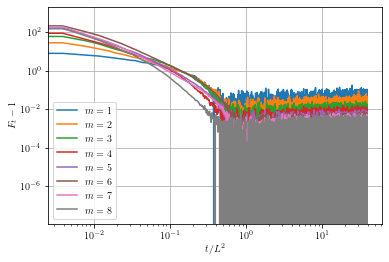

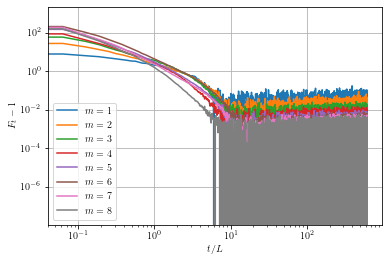

In [14]:
for m, purity in zip(ms, pure_purities):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), purity - 1, label=fr"$m = {m}$")

pyplot.xlabel('$t/L^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, f'l_{l}_purestate_estimator_diff_scaled_intertwined.pdf'))
pyplot.show()

for m, purity in zip(ms, pure_purities):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l), purity - 1, label=fr"$m = {m}$")

pyplot.xlabel('$t/L$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, f'l_{l}_purestate_estimator_diff_scaled_intertwined.pdf'))
pyplot.show()